In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.integrate import solve_ivp
from mandelbrot import mandelbrot_divergence
from matplotlib.colors import ListedColormap

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.size": 12,
    "axes.labelsize": 16,
    "axes.labelweight": "bold",
    "axes.titlesize": 18,
    "axes.titleweight": "bold",
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "lines.linewidth": 1.5,
    "grid.linewidth": 1.0,
    "figure.figsize": [10, 6],
    "figure.dpi": 150,  # Higher DPI for better resolution
})

### Question 1

In [19]:
xs = []
ys = []
divergence_steps = []
colors = []

# Grid resolution and bounds
steps = 500
xmin, xmax = -2, 2
ymin, ymax = -2, 2

# Iterate over complex plane
for i in range(steps):
    for j in range(steps):
        x = xmin + (xmax - xmin) * i / steps
        y = ymin + (ymax - ymin) * j / steps
        c = complex(x, y)
        result = mandelbrot_divergence(c)

        xs.append(x)
        ys.append(y)
        divergence_steps.append(result if result != -1 else 50)


        if result == -1:
            colors.append(0)  # bounded
        else:
            colors.append(1)  # diverged


In [20]:
print(max(divergence_steps))

50


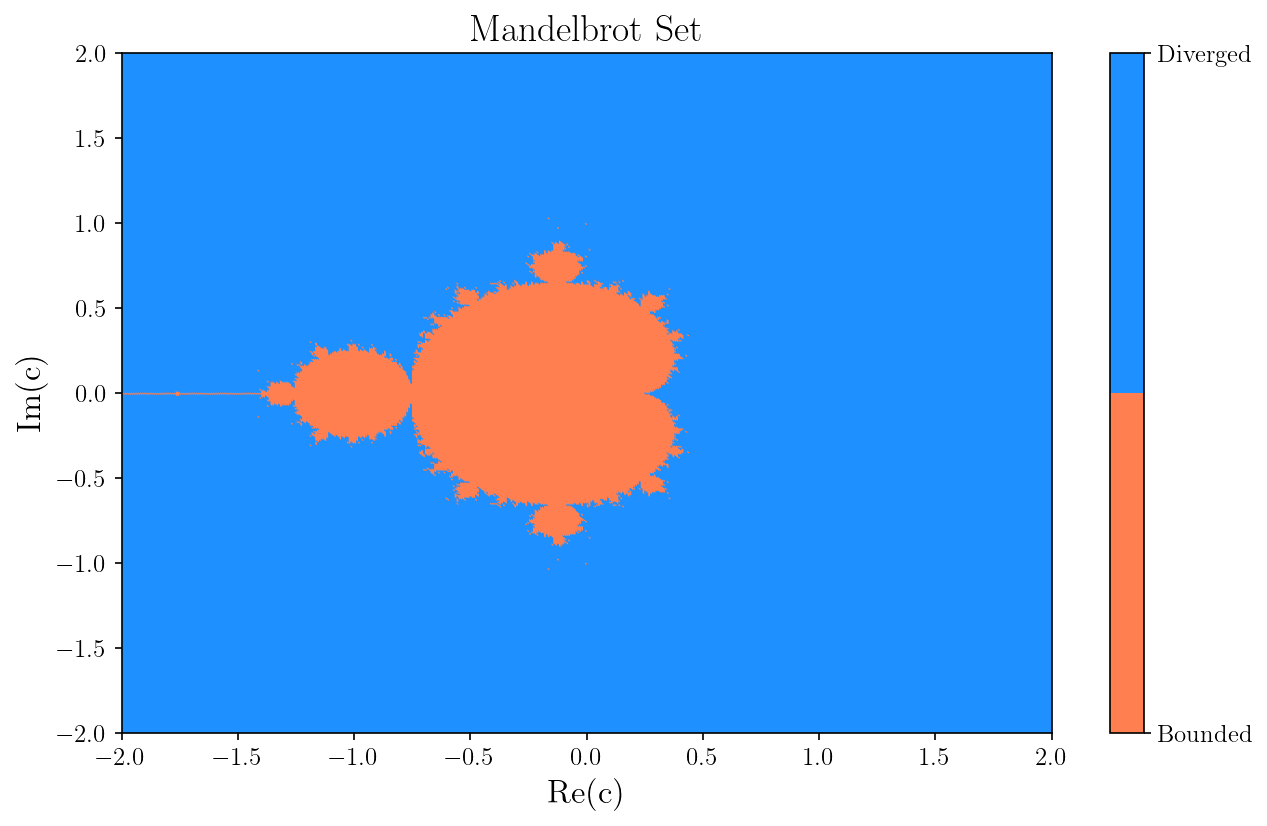

In [22]:
cmap = ListedColormap(['coral', 'dodgerblue'])

sc = plt.scatter(xs, ys, c=colors, cmap=cmap, s=0.5)

cbar = plt.colorbar(sc, ticks=[0, 1])
cbar.ax.set_yticklabels(['Bounded', 'Diverged'])

plt.title("Mandelbrot Set")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

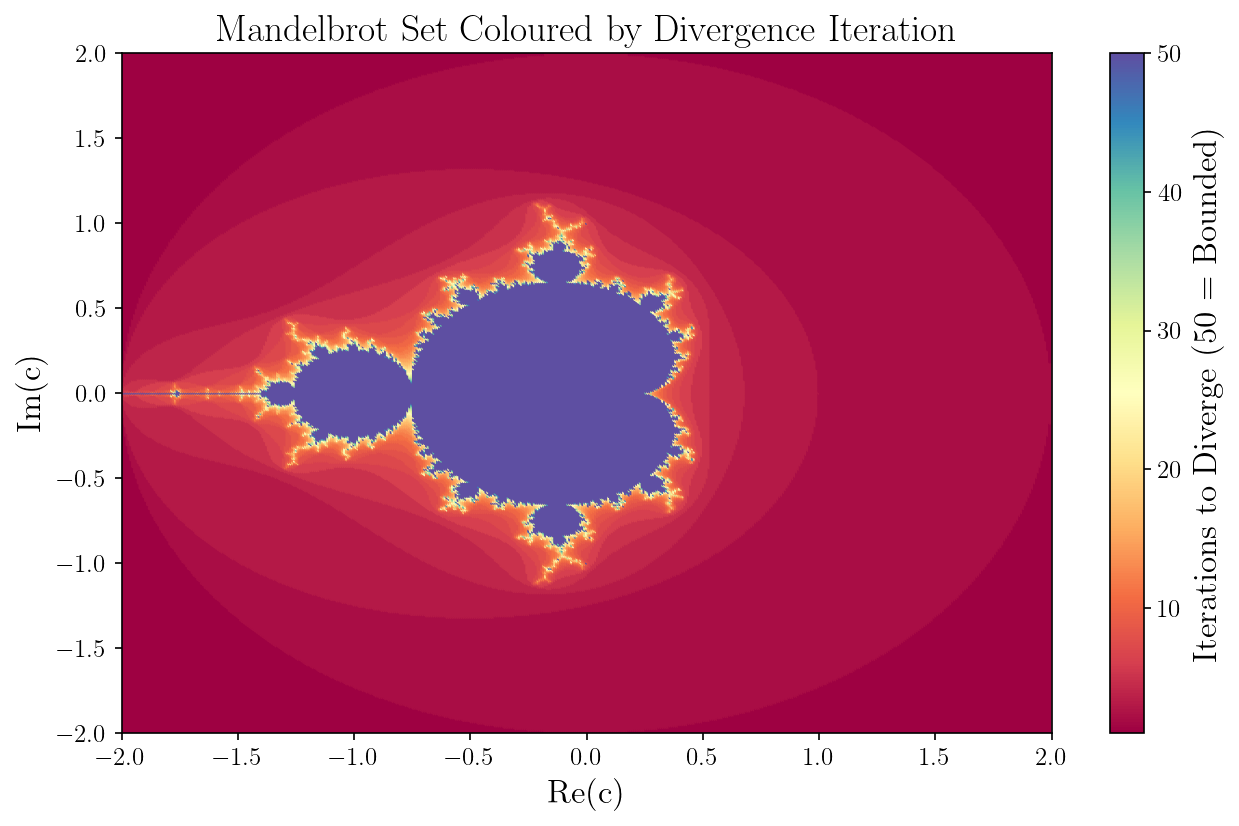

In [23]:
scatter = plt.scatter(xs, ys, c=divergence_steps, cmap='Spectral', s=0.5)
plt.colorbar(scatter, label='Iterations to Diverge (50 = Bounded)')
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title("Mandelbrot Set Coloured by Divergence Iteration")
plt.show()

### Question 2

In [6]:
def Lorenz_X(x, y, sigma):
    """
    Compute dX/dt for the Lorenz system.

    Parameters:
    x : float, Current value of X.
    y : float, Current value of Y.
    sigma : float, Prandtl number.

    Returns:
    float, The time derivative dX/dt.
    """
    return sigma * (y - x)


def Lorenz_Y(x, y, z, r):
    """
    Compute dY/dt for the Lorenz system.

    Parameters:
    x : float, Current value of X.
    y : float, Current value of Y.
    z : float, Current value of Z.
    r : float, Rayleigh number.
    
    Returns:
    float, The time derivative dY/dt.
    """
   
    return (r * x) - y - (x * z)


def Lorenz_Z(x, y, z, b):
    """
    Compute dZ/dt for the Lorenz system.

    Parameters:
    x : float, Current value of X.
    y : float, Current value of Y.
    z : float, Current value of Z.
    b : float, Dimensionless length scale.
    
    Returns:
    float, The time derivative dZ/dt.
    """
    return (-b * z) + (x * y)


In [7]:
# Lorenz system parameters
sigma = 10.0
r = 28.0
b = 8.0 / 3.0

# Initial conditions and time span
W0 = [0.0, 1.0, 0.0]
dt = 0.01
t_max = 60
t_eval = np.arange(0, t_max, dt)

In [8]:
# Derivative function for solve_ivp
def lorenz_system(t, W):
    x, y, z = W
    dx = Lorenz_X(x, y, sigma)
    dy = Lorenz_Y(x, y, z, r)
    dz = Lorenz_Z(x, y, z, b)
    return [dx, dy, dz]

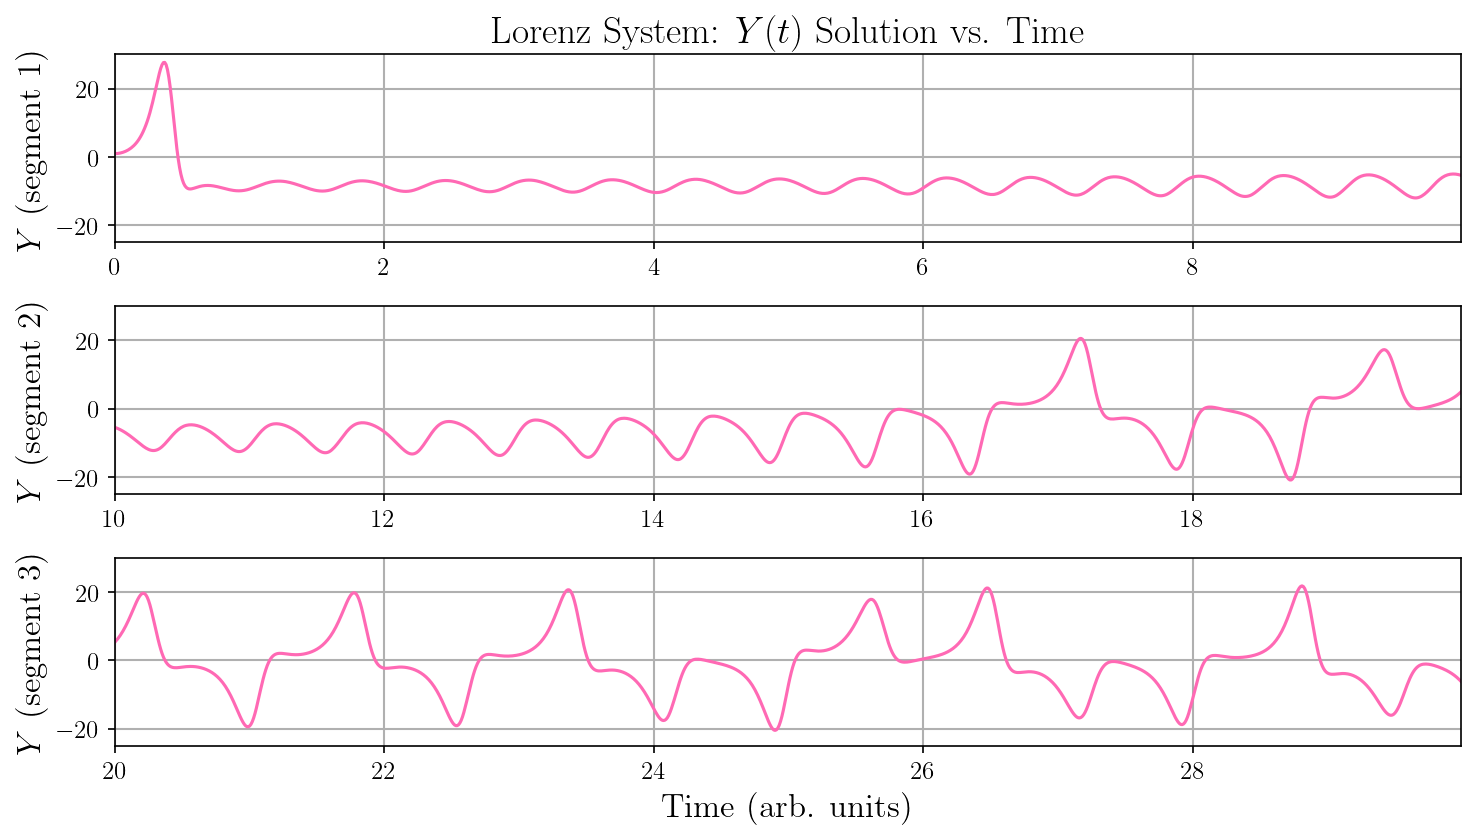

In [9]:
sol = solve_ivp(lorenz_system, (0, t_max), W0, t_eval=t_eval)

fig, axs = plt.subplots(3, 1)

for i in range(3):
    start = i * 1000
    end = start + 1000
    x_segment = t_eval[start:end]
    y_segment = sol.y[1][start:end]
    
    axs[i].plot(x_segment, y_segment, color='hotpink')
    axs[i].set_ylabel(f'$Y$ (segment {i+1})')
    axs[i].set_ylim(-25, 30)
    axs[i].set_xlim(x_segment[0], x_segment[-1])
    axs[i].grid(True)

axs[2].set_xlabel('Time (arb. units)')
axs[0].set_title('Lorenz System: $Y(t)$ Solution vs. Time')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


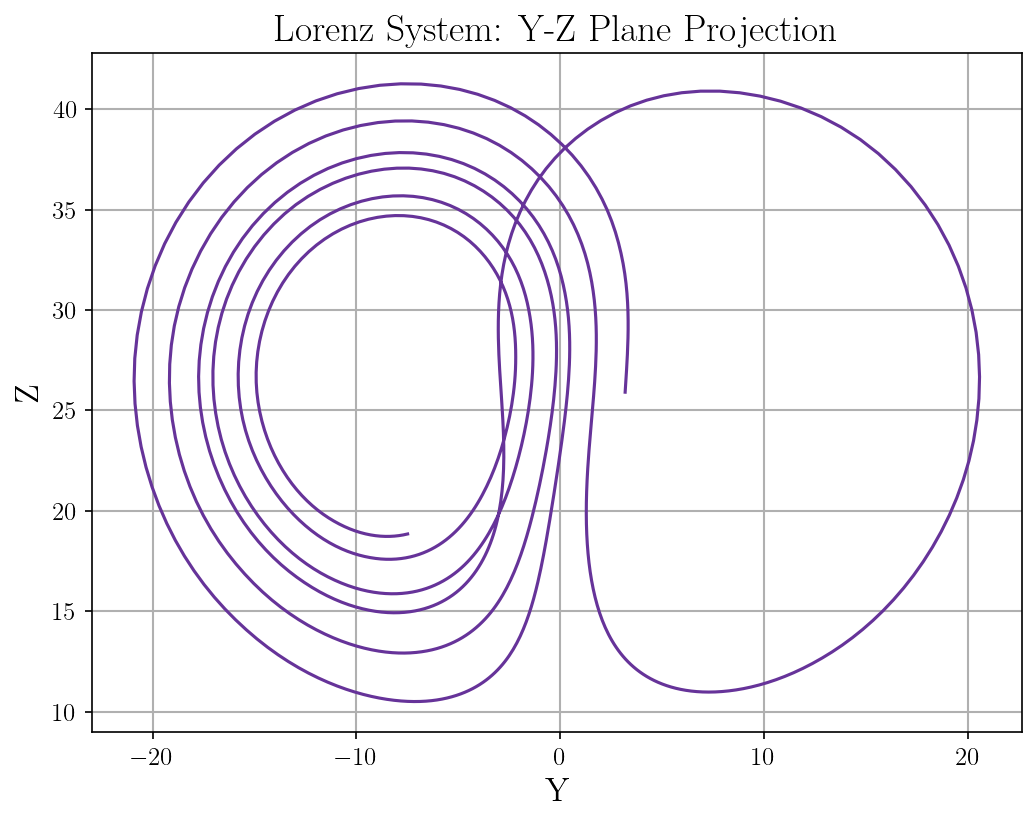

In [10]:
# Integrate from t = 0 to 19 to let attractor settle
sol2 = solve_ivp(lorenz_system, [0, 19], W0, dense_output=True)

# Extract t, x, y, z
t = np.linspace(14, 19, 1000)
x, y, z = sol2.sol(t)

# Plot Y-Z projection

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(y, z, color='rebeccapurple')
ax.set_xlabel("Y")
ax.set_ylabel("Z")
ax.set_title("Lorenz System: Y-Z Plane Projection")
ax.grid(True)
plt.show()


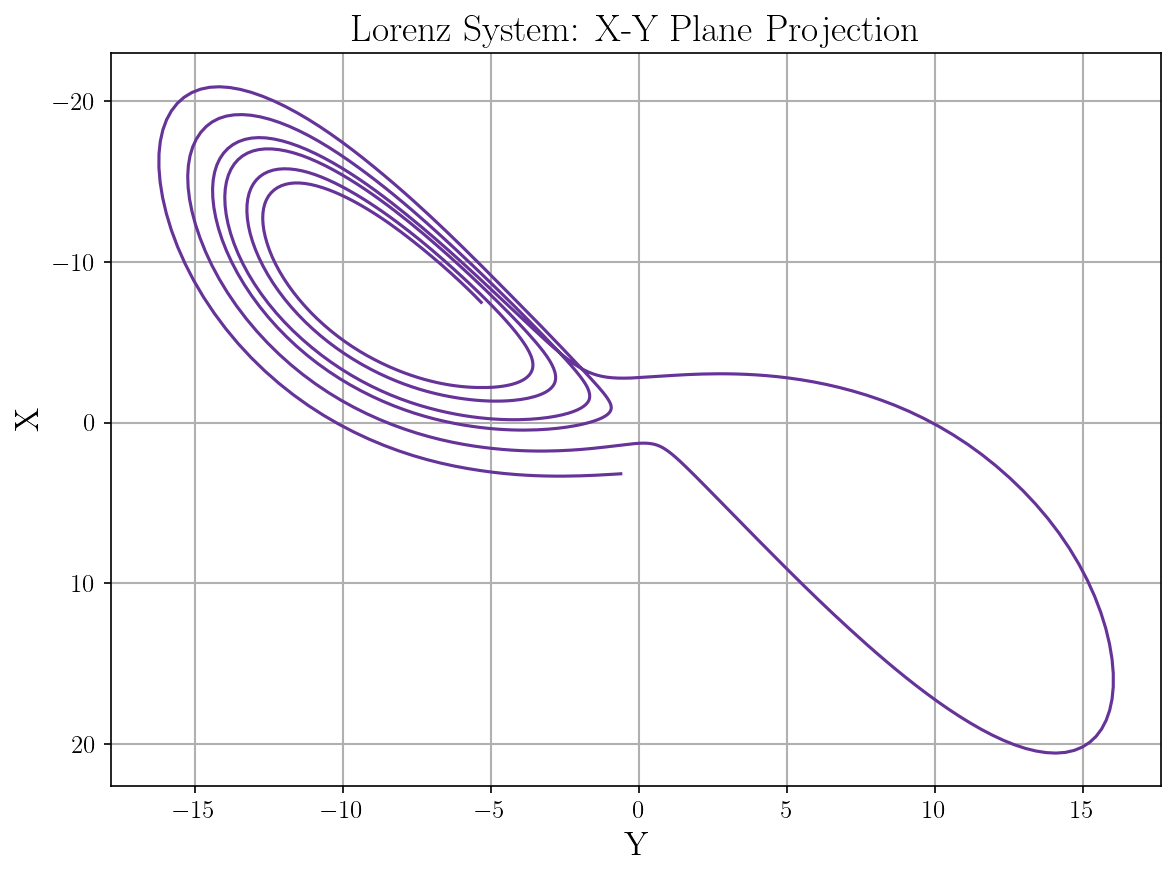

In [11]:
# Plot Y-Z projection
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, color='rebeccapurple')
ax.set_xlabel("Y")
ax.set_ylabel("X")
ax.set_title("Lorenz System: X-Y Plane Projection")
ax.invert_yaxis()
ax.grid(True)


plt.tight_layout()
plt.show()

In [12]:
# Initial conditions
W0 = [0.0, 1.0, 0.0]
W0_prime = [W0[i] + d for i, d in enumerate([0.0, 1e-8, 0.0])]

# Integrate both systems
sol1 = solve_ivp(lorenz_system, [0, t_max], W0, t_eval=t_eval, rtol=1e-10, atol=1e-12)
sol2 = solve_ivp(lorenz_system, [0, t_max], W0_prime, t_eval=t_eval, rtol=1e-10, atol=1e-12)

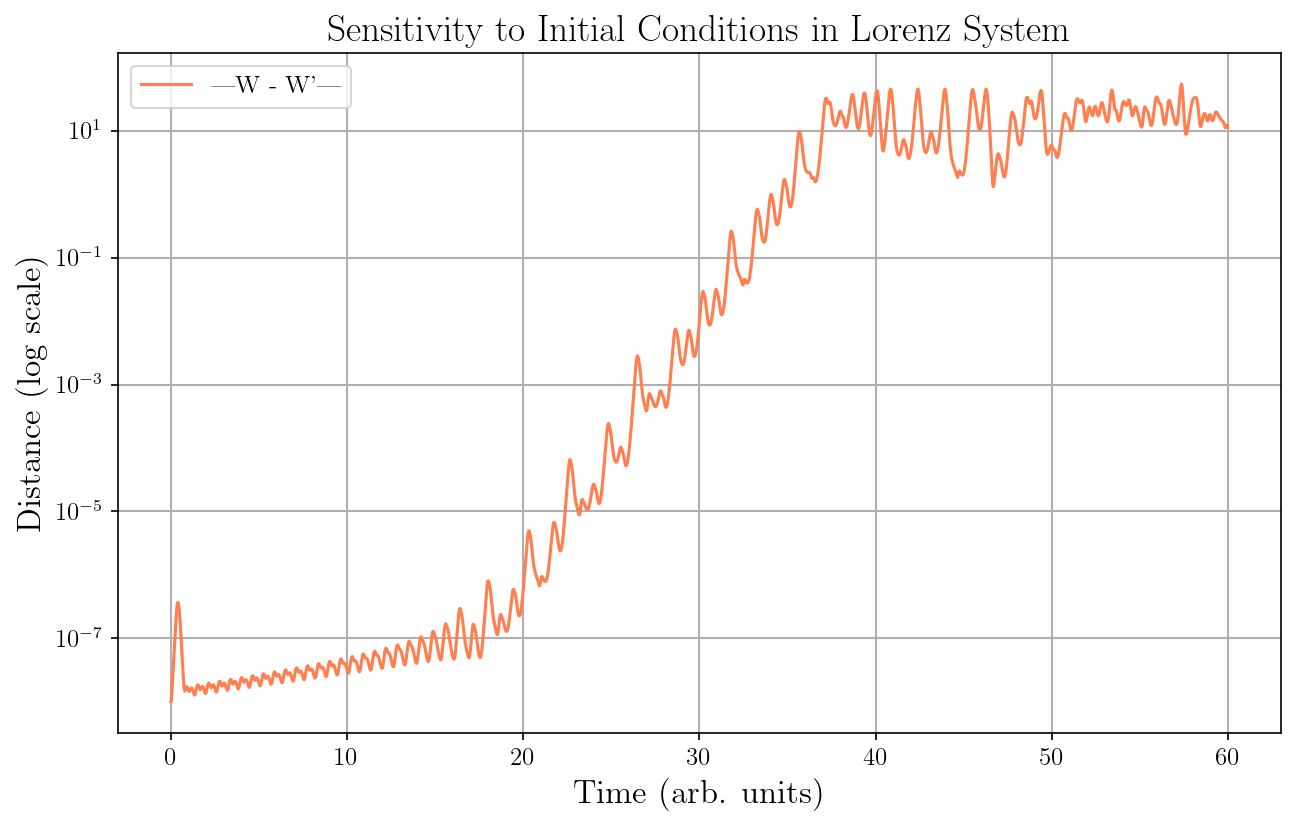

In [13]:
# Compute Euclidean distance between the two solutions
delta = np.linalg.norm(sol1.y - sol2.y, axis=0)

# Plot on semilog scale
plt.figure()
plt.semilogy(t_eval, delta, label=f'|W - W\'|', color='coral')
plt.xlabel("Time (arb. units)")
plt.ylabel("Distance (log scale)")
plt.title("Sensitivity to Initial Conditions in Lorenz System")
plt.grid(True)
plt.legend()
plt.show()